# Perform image tagging with pollen-vision

Learn how to perform image tagging with the pollen-vision library, using RAM++.

This notebook will show you how to use our wrapper for the RAM++ image tagging model developped by Xinyu Huang et al. at the Oppo research institute.

## A word on RAM++

RAM stands for Recognize Anything Model. RAM is an image tagging model which can recognize any common category of object with high accuracy. RAM++ is the newest generation of RAM which can now also perform zero shot image tagging. This means that the model is able to tag images with any object, considering you provide it with a description of the object.

This is very useful for us in Robotics because we can include this in applications to adapt the robot behavior depending of its environment. For example if we ask the robot to try to grasp a mug, it can first check whether there is a mug to grasp or not and if not perform another behavior.

You can find the RAM++ paper [here](https://arxiv.org/abs/2310.15200). Our wrapper for RAM uses [its implementation](https://github.com/xinyu1205/recognize-anything?tab=readme-ov-file) for the authors of the paper, credits to them!

## Use the RAM wrapper

In [1]:
import numpy as np
from PIL import Image

from pollen_vision.vision_models.object_detection import RAM_wrapper

To use pollen-vision's RAM wrapper, you just need to provide a description file

In [2]:
wrapper = RAM_wrapper(objects_descriptions_filename="example_objects_descriptions")

Creating pretrained CLIP model


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:02<00:00,  6.48it/s]


--------------
/home/simsim/Pollen/ai-dev/vision/pollen-vision/pollen_vision/checkpoints/ram_plus_swin_large_14m.pth
--------------
load checkpoint from /home/simsim/Pollen/ai-dev/vision/pollen-vision/pollen_vision/checkpoints/ram_plus_swin_large_14m.pth
vit: swin_l


The object classes that RAM can tag with the configuration file can be checked with the *open_set_categories* attribute.

In [3]:
print(wrapper.open_set_categories)

['mug', 'bottle', 'fork', 'drawer', 'laptop', 'chair', 'lamp', 'sponge', 'sink', 'dishwasher', 'oven', 'phone', 'robot']


Import the image you want to perform the inference on. 

Here we will take one of the test image of the project. We placed the demo images and videos in the imagesfolder. Feel free to import your own image!

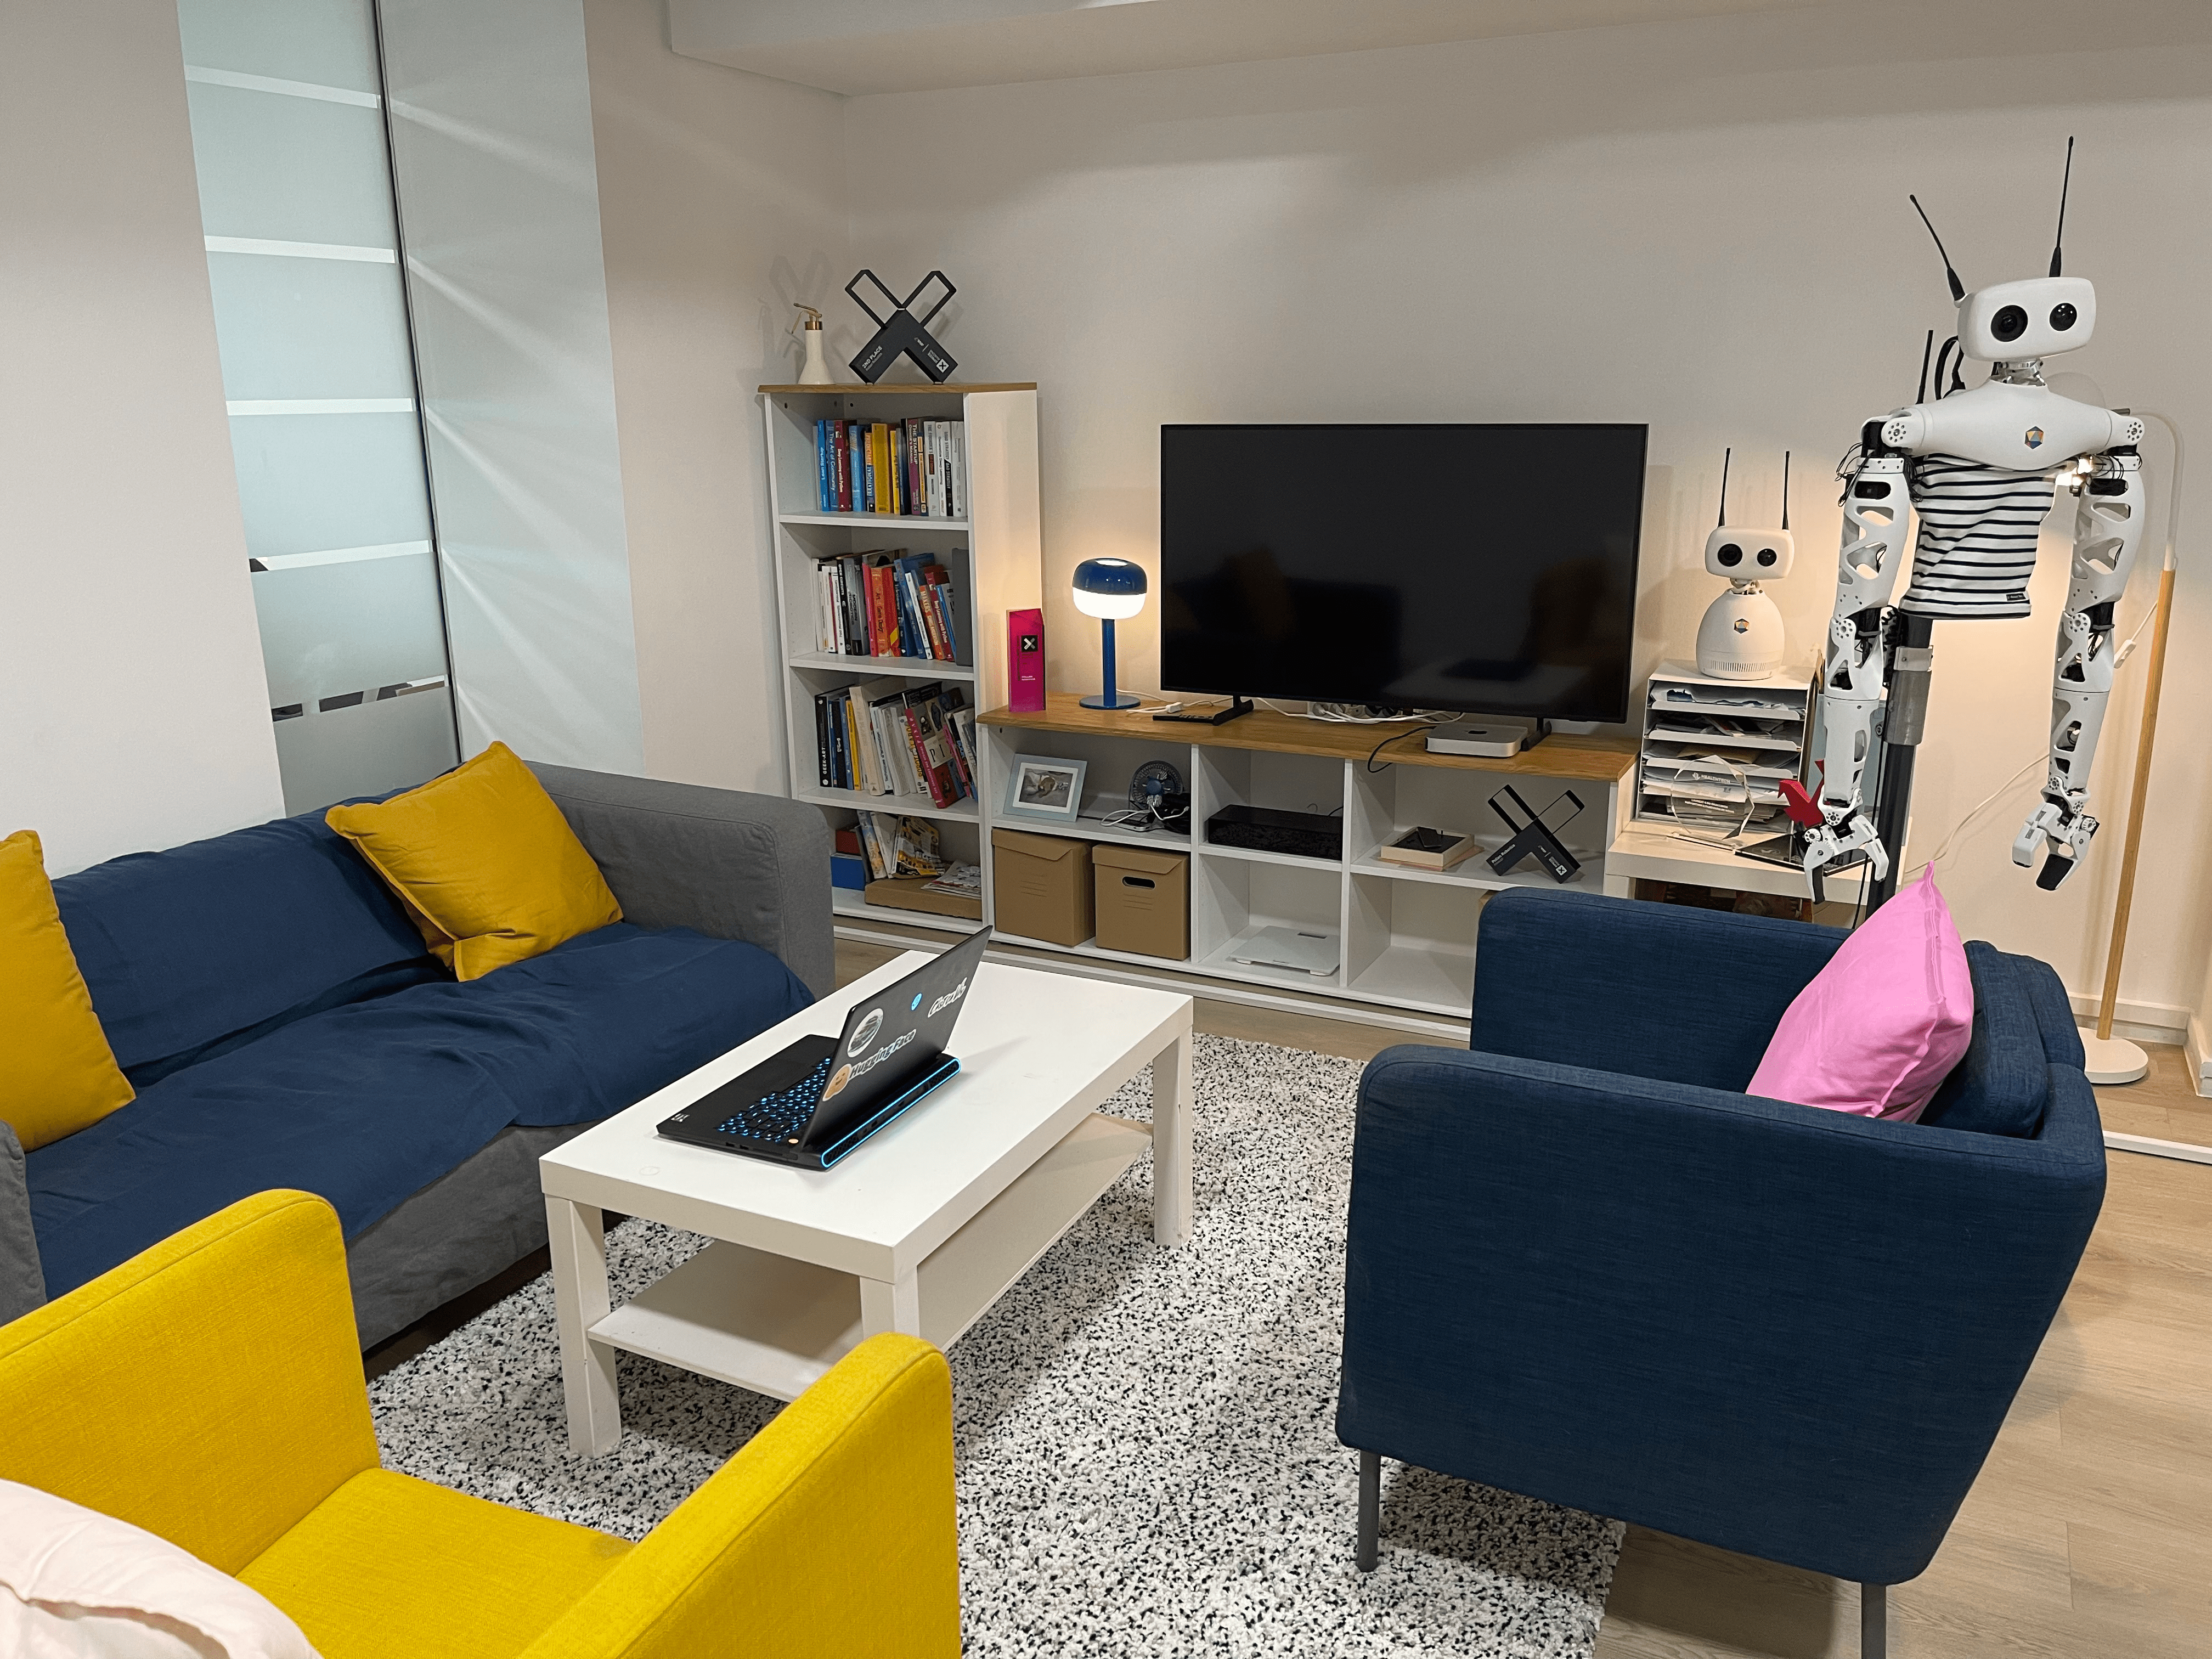

In [2]:
img = Image.open('images/reachy_living_room.png')
img

In [5]:
wrapper.infer(np.array(img))

['']

## Generate a new description file
You can also easily generate a new description file using pollen-vision. This file can then be used by the RAM wrapper.

In [3]:
from pollen_vision.vision_models.object_detection import ObjectDescriptionGenerator

💡 Please note that you will need an OpenAI API key for this as the generator uses the GPT 3.5 model to perform the generation.
By default the ObjectDetectionGenerator object looks at init for the API key defined with the **OPENAI_API_KEY** environment variable. If you prefer, you can just pass your API key as argument of the init with the *api_key* argument. 

In [4]:
object_detection_generator = ObjectDescriptionGenerator()

Just call the *generate_descriptions* method to generate the discription for the objects you want. Pass a list of objects names as argument.

In [5]:
objects_descriptions = object_detection_generator.generate_descriptions(objects=["tv", "rag", "laptop", "seats", "white robot"])

By default, 10 descriptions are generated per object. This can be changed with the optional argument *generation_nb_per_object* of the *generate_descriptions* method.

In [6]:
print(objects_descriptions)

{
    "tv": [
        "High-definition display for crystal-clear images",
        "Smart TV functionality for streaming and apps",
        "Sleek and slim design to complement any living space",
        "Immersive sound quality for a cinematic experience",
        "Multiple HDMI and USB ports for versatile connectivity",
        "Energy-efficient technology for lower power consumption",
        "Built-in digital tuner for access to free over-the-air channels",
        "Remote control with voice recognition for easy navigation",
        "Wall-mountable for flexible placement options",
        "Wide viewing angles for comfortable viewing from any position"
    ],
    "rag": [
        "Soft and absorbent material for cleaning and dusting",
        "Lint-free and non-abrasive for gentle use on delicate surfaces",
        "Reusable and machine washable for eco-friendly cleaning",
        "Available in various sizes for different cleaning tasks",
        "Durable and long-lasting for cost-ef

You can save the descriptions you just generated to a json file that you can later use with RAM using the *save_descriptions* method. The description file will be saved in the object_descriptions folder.

In [7]:
object_detection_generator.save_descriptions(descriptions=objects_descriptions, descriptor_file_name='my-object-descriptor')

Descriptions saved to /home/simsim/Pollen/ai-dev/vision/pollen-vision/pollen_vision/pollen_vision/vision_models/object_detection/recognize_anything/objects_descriptions/my-object-descriptor.json


You can then use the description file you just generated with RAM.

In [8]:
my_new_ram_wrapper = RAM_wrapper(objects_descriptions_filename='my-object-descriptor')

Creating pretrained CLIP model


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.44it/s]


--------------
/home/simsim/Pollen/ai-dev/vision/pollen-vision/pollen_vision/checkpoints/ram_plus_swin_large_14m.pth
--------------
load checkpoint from /home/simsim/Pollen/ai-dev/vision/pollen-vision/pollen_vision/checkpoints/ram_plus_swin_large_14m.pth
vit: swin_l


Let's perform the image tagging with the same image as before.

In [9]:
my_new_ram_wrapper.open_set_categories

['tv', 'rag', 'laptop', 'seats', 'white robot']

In [10]:
my_new_ram_wrapper.infer(np.array(img))

['tv', 'seats']